# Import library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import dataset

In [2]:
df=pd.read_csv("..\Materi\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Informasi data

- age - age in years
- sex - (1=male; 0=female)
- cp - chest pain type
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1=true; 0=false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1=yes; 0=no)
- oldpeak - ST depression induced by exercise relative to rest 
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3=normal; 6=fixed defect; 7=reversable defect
- target - have disease or not (1=yes, 0=no)

# Data Exploration

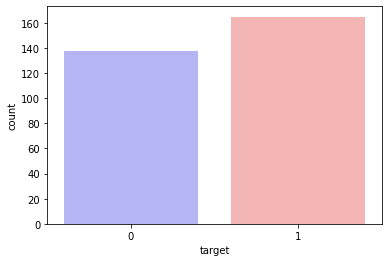

In [4]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [5]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


# Select data target

In [8]:
y = df.target.values
x = df.drop(['target'], axis = 1)

Kita akan membagi data menjadi 80% untuk data trainning dan 20% untuk data testing

# Split Data Training

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [10]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

# Build Model Naive Bayes Algorithm

In [11]:
from sklearn.naive_bayes import GaussianNB

accuracies = {}

nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 85.25%


# Evaluasi Model

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(cf_matrix, annot=True)